In [3]:
#from: http://www.data-mania.com/blog/customer-profiling-and-segmentation-in-python/

SCENARIO:

You are a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers.  You've decided to try out customer profiling and segmentation.  After much thought, you decide on the two factors that you think the customers would value the most. Those are:

- A savings on premium paid
- The local availability of nearby insurance agents

The importance of these are measured using a 'likert scale', wherein a rating of 1 represents not important and a rating of 7 represent very important.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
data = pd.read_csv('sample.csv')

In [22]:
# since we are calculating Euclidian distance, we need to scale the data:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
data.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [21]:
# look for null values in the data.  Here there are none (yay!)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
Premium Savings very important    150 non-null int64
Agent Not Important               150 non-null int64
dtypes: int64(2)
memory usage: 2.4 KB


In [11]:
# scaling the data

X = data
X = X.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# before performing K-means clustering, let's figure out the optimal number of clusters required... 
# ... use the elbow method.

cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit ( X_scaled )
    cluster_errors.append( clusters.inertia_ )

In [13]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,cluster_errors,num_clusters
0,300.000000,1
1,69.709387,2
2,46.927720,3
3,36.932192,4
4,29.766295,5
5,23.265298,6
6,20.315304,7
7,16.459226,8
8,13.755411,9


In [14]:
# above shows a massive difference between the WSS value of cluster 1 (300) and cluster 2 (69.70)
# ...thus we can choose to use 2 clusters.


Text(0,0.5,'WSS value')

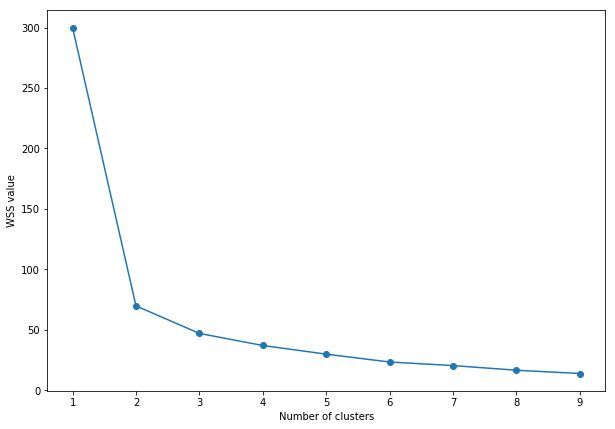

In [15]:
# visualizing the elbow method, looking for the clear bend between clusters 1 and 2.

plt.figure(figsize=(10,7))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('WSS value')


In [16]:
# fitting the k-means algorithm on the data...

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_means = kmeans.predict(X)

In [17]:
# looking at the cluster determined for each observation.

y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
# Since there are only 2 clusters, we can have a look at the calculated centroid values:

centers = kmeans.cluster_centers_
centers

array([[ 5.77027027,  5.85135135],
       [ 2.46052632,  2.28947368]])

Text(0,0.5,'Agent not important')

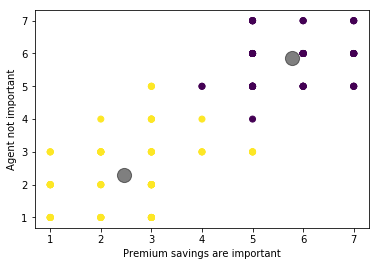

In [20]:
# visualize the clusters formed

plt.scatter(X[:, 0], X[:, 1], c=y_means)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Premium savings are important')
plt.ylabel('Agent not important')

By looking at the above, we can easily see that there are two segments of potential customers. Those are:

Segment 1 = potential customers who want agents in their neighborhood and who are willing to spend more on premiums.

Segment 2 = potential customers who don't really care whether there's an agent in their neighborhood but do, however, demand to pay lower premiums on their insurance policies.



Applied to real-world example, this can be used to craft targeted offers and optimized marketing messages.